#LDA bigrams all word combinations

# creating bigrams

In [2]:
# dataset for the bigrams all word combinations
bi_all = df['cleanned_text']

# Function to generate bigrams
def generate_bigrams(text):
    bigrams = []
    for i in range(len(text) - 1):

        # Filter out bigrams with the same words repeated
        if text[i] != text[i + 1]:
            bigram = text[i] + "_" + text[i + 1]
            bigrams.append(bigram)
    return bigrams

# Generate bigrams for all texts
all_bigrams = []
for text in bi_all:
    bigrams = generate_bigrams(text)
    all_bigrams.append(bigrams)

# Filter out texts that do not have any bigrams
all_bigrams = [bigrams for bigrams in all_bigrams if bigrams]

# Check if all_bigrams are empty
if not all_bigrams:
    print("No bigrams found. Please check your input texts.")
    exit()


[0.7049767296890252, 0.6906870630798576, 0.6880405009283665, 0.679287642817132, 0.6551215609133502, 0.656126098514519, 0.6499213809303914, 0.6359107599248774, 0.6221069941422432, 0.6118908814726312, 0.6035293178076095, 0.5883585175225452, 0.5811774108098783, 0.576371374576784, 0.5611337998277725, 0.5470577196754027, 0.5403136042225132, 0.5358934940535895, 0.5156867906377898, 0.5237577814871239]


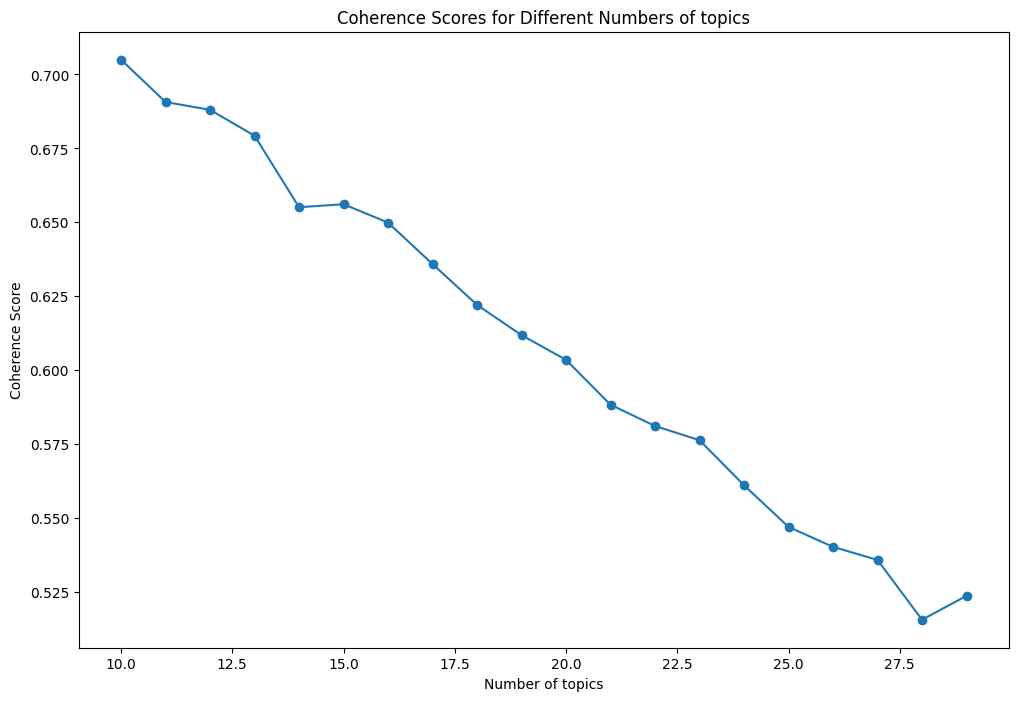

In [4]:
# Create a dictionary
id2word = corpora.Dictionary(all_bigrams)

# Filter out words that occur in less than 1 documents or more than 10% of the documents
id2word.filter_extremes(no_below=1, no_above=0.01)

# Create a corpus
corpus = [id2word.doc2bow(doc) for doc in all_bigrams]

# Set the number of runs to obtain an average coherence score
runs = 10

# Set the range of cluster numbers to evaluate
cluster_range = range(10, 30)

# Create list to store coherence score
coherence_scores = []

# Create list to store average coherence scores
avg_coherence_scores = []
models = []

# Calculate coherence scores for each cluster number
for num_clusters in cluster_range:
    random.seed(42)
    model_coherences = []
    for _ in range(runs):

        # Initialize the LDA model
        model = LdaModel(corpus=corpus, num_topics=num_clusters)

        # Print the coherence score of the model
        coherencemodel = CoherenceModel(model=model, texts=all_bigrams, dictionary=id2word, coherence='c_v')
        coherence_scores.append(coherencemodel.get_coherence())

        # Calculate coherence per run
        model_coherences.append(coherencemodel.get_coherence())

    # Calculate average coherence
    avg_coherence = sum(model_coherences) / runs

    # Append average coherence to separate list
    avg_coherence_scores.append(avg_coherence)
    models.append(model)

# Print the average coherence score
print(avg_coherence_scores)

# Visualize the coherence scores in a plot
plt.figure(figsize=(12, 8))
plt.plot(cluster_range, avg_coherence_scores, marker='o')
plt.xlabel("Number of topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Numbers of topics")
plt.show()

##Grid research for the alpha and eta

In [5]:
# Define the alpha and eta values to evaluate
alpha_range = [0.01, 0.05, 0.1, 0.5,5]
eta_range = [0.01, 0.05, 0.1, 0.5,5]

best_coherence = -1.0
best_alpha = None
best_eta = None

# Iterate over all combinations of alpha and eta
for alpha in alpha_range:
    for eta in eta_range:
        model = LdaModel(corpus=corpus, num_topics=10, id2word=id2word, alpha=alpha, eta=eta)
        coherence_model = CoherenceModel(model=model, texts=all_bigrams, dictionary=id2word, coherence='c_v')
        coherence_score = coherence_model.get_coherence()

        print("Alpha:", alpha, "Eta:", eta, "Coherence Score:", coherence_score)

        # Check if this is the best coherence score so far
        if coherence_score > best_coherence:
            best_coherence = coherence_score
            best_alpha = alpha
            best_eta = eta

# Print the best coherence score and corresponding alpha and eta values
print("Best Coherence Score:", best_coherence)
print("Best Alpha:", best_alpha)
print("Best Eta:", best_eta)

Alpha: 0.01 Eta: 0.01 Coherence Score: 0.688003947082374


Alpha: 0.01 Eta: 0.05 Coherence Score: 0.6926111871627602


Alpha: 0.01 Eta: 0.1 Coherence Score: 0.7093876795561996


Alpha: 0.01 Eta: 0.5 Coherence Score: 0.6863700200383414


Alpha: 0.01 Eta: 5 Coherence Score: 0.6904280272957461


Alpha: 0.05 Eta: 0.01 Coherence Score: 0.696926740328527


Alpha: 0.05 Eta: 0.05 Coherence Score: 0.6898477347808675


Alpha: 0.05 Eta: 0.1 Coherence Score: 0.7002436435921051


Alpha: 0.05 Eta: 0.5 Coherence Score: 0.7029799529605248


Alpha: 0.05 Eta: 5 Coherence Score: 0.684246542245237


Alpha: 0.1 Eta: 0.01 Coherence Score: 0.6783000382154295


Alpha: 0.1 Eta: 0.05 Coherence Score: 0.6952383694636237


Alpha: 0.1 Eta: 0.1 Coherence Score: 0.6906365786801769


Alpha: 0.1 Eta: 0.5 Coherence Score: 0.6761506573319371


Alpha: 0.1 Eta: 5 Coherence Score: 0.701833969847621


Alpha: 0.5 Eta: 0.01 Coherence Score: 0.5597826219767909


Alpha: 0.5 Eta: 0.05 Coherence Score: 0.6064507773547978


Alpha: 0.5 Eta: 0.1 Coherence Score: 0.5679927446573265


Alpha: 0.5 Eta: 0.5 Coherence Score: 0.5536552258227302


Alpha: 0.5 Eta: 5 Coherence Score: 0.5848877549509779


Alpha: 5 Eta: 0.01 Coherence Score: 0.7967656358477522


Alpha: 5 Eta: 0.05 Coherence Score: 0.7976541374166076


Alpha: 5 Eta: 0.1 Coherence Score: 0.7979783549012404


Alpha: 5 Eta: 0.5 Coherence Score: 0.7963984648415208
Alpha: 5 Eta: 5 Coherence Score: 0.7928313897568953
Best Coherence Score: 0.7979783549012404
Best Alpha: 5
Best Eta: 0.1


## LDA model with the optimal number of topics, alpha and eta

In [7]:
# Initialize the alpha and eta
alpha = 0.1
eta = 0.01

# Initialize the LDA model with specified parameters
model = LdaModel(corpus=corpus, num_topics=10,id2word=id2word, alpha=alpha, eta=eta)

# Calculate the coherence score of the model
coherence_model = CoherenceModel(model=model, texts=all_bigrams, dictionary=id2word, coherence='c_v')
coherence_score = coherence_model.get_coherence()

# Print the coherence score of the model
print("Coherence Score:", coherence_score)

Coherence Score: 0.7119088962293263


In [8]:
# Number op topic with the highest coherence value
N_TOPICS = 10

# Getting words with the highest probability for the each topic
for topic in range(N_TOPICS):
    words = model.show_topic(topic, 10)
    topic_n_words = ' '.join([word[0] for word in words])
    print('Topic {}: {}'.format(str(topic), topic_n_words))

Topic 0: leiding_gevende algemene_mail graag_weten nieuwe_medewerkers hoog_tijd voel_veilig bewust_leiderschap visie_strategie keuzes_gemaakt vollediger_beeld
Topic 1: integraal_project info_ontwikkeling gaat_goed manager_teamleider werknemers_goede goed_gaat goed_werkt rechtstreekse_leidinggevende leave_request vorig_jaar
Topic 2: graag_geinformeerd bepaalde_zaken rata_inhaalrustdagen pro_rata goede_werkkrachten week_werkt nieuw_project programmatisch_projectmatig kick_off hoor_kantoren
Topic 3: ten_goede werk_komt projecten_inschrijven gaat_goed mogelijkheden_groeien goede_komen duurt_lang kost_energie diepe_gegooid gesprek_leidinggevende
Topic 4: dag_week sector_kunde grote_projecten vorig_jaar thuis_werken afdeling_sector nieuwe_manager werk_minimaal gezien_gehoord programma_functies
Topic 5: soort_onderzoeken contact_werkvloer jonge_collega meerdere_talen ontwikkeling_nieuwe nieuwe_producten ongewenst_gedrag klanten_collega auto_nodig betere_communicatie
Topic 6: mensen_ziek doelg